# Lending Club Case Study - EDA

## Situation:
    
We work for a consumer finance company that specializes in lending various types of loans to urban customers. When we receive a loan application, we have to make a decision for loan approval based on the applicant's profile.There are two types of risks are associated with our decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business for us.

* If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to a financial loss for our company.

The following provided data contains information about past loan applicants and whether they 'defaulted' or not. Our aim will be to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc.
At this moment the company have the data of individual whose Loan had been accepted and falls under three categories.
1. Who had paid full loan along with interest
2. Who is still in the process of paying the installments and had been paying at time
3. Who haven't paid the installments in due time for long period of time.

## Task:
This company is like a big online store for loans which help people get personal loans, business loans, and even pay for medical procedures. The company had made it really easy for people to apply for a loan online and get a good interest rate.

But, just like any other loan company, It sometimes lose money when people don't pay back the money they borrowed. This is called "credit loss." Basically, when borrowers don't pay their loans or disappear without repaying, it causes a lot of financial trouble for the company. In this case, the customers who don't pay their loans are called "charged-off."

So, now our task is to help the company to figure out who these risky borrowers are before giving them a loan. If we can do that, they can reduce the amount of money they lose from people not paying back their loans. We will be using  a method called "Exploratory Data Analysis" (EDA) to find out which factors or information about the borrowers are strong signals that someone might not pay back their loan.

In simple terms, The company want to understand what things make it more likely for someone to not repay their loan. This way, they can be smarter about who they give loans to and reduce their financial risk.

## Action:

Our approach to help the company to understand or analyse more about the financial risk will be done by following steps on Data provided to us.
1. Data Cleaning: We will be Removing the null valued columns, unnecessary variables and checking the null value percentage and removing the respective rows.
2. Data Understanding: We will be working with the data dictionary and getting knowledge of all the columns and their domain specific uses
3. Univariate Analysis: We will be analysing each column and plotting the distributions of each column.
4. Segmented Univariate Analysis: We will be Analysing the continuous data columns with respect to the categorical column
5. Bivariate Analysis: We  will be analysing the two variable behaviour like term and loan status with respect to loan amount.
7. Insights: We will analyse all plots and recommendations for reducing the loss of business by detecting columns best which contribute to loan defaulters.

### Execution Steps
#### Importing Packages And Loading data and data sets

In [180]:
# importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.color_palette("Spectral", as_cmap=True)
sns.set_style("whitegrid", {'axes.grid' : False})

In [181]:
# loading the data and print it
loan_data = pd.read_csv("loan.csv")
loan_data.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [182]:
# loading the data set and print it
loan_ds = pd.read_excel("Data_Dictionary.xlsx")
loan_ds.head(5)

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

#### Basic information about the data

In [183]:
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())
# sum it up to check how many rows have all missing values
print('Number of empty Rows:', loan_data.isnull().all(axis=1).sum() )
# sum it up to check how many columns have all missing values
print('Number of empty Columns:', loan_data.isnull().all(axis=0).sum())
# checking number of repeated or duplicate id in the dataframe
print('Number of duplicate id:', loan_data.id.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263364
Number of unique values: 416801
Number of duplicates: 0
Number of empty Rows: 0
Number of empty Columns: 54
Number of duplicate id: 0


In [184]:
# Basic infomation about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [185]:
# Data types of each column
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [186]:
# numerical attributes described
loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [187]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


* ### Data Cleaning

In [188]:
# finding out Which columns have all null values
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [189]:
# Identifying columns with large amount null values based on percentage
missing = (loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False)
print(missing)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


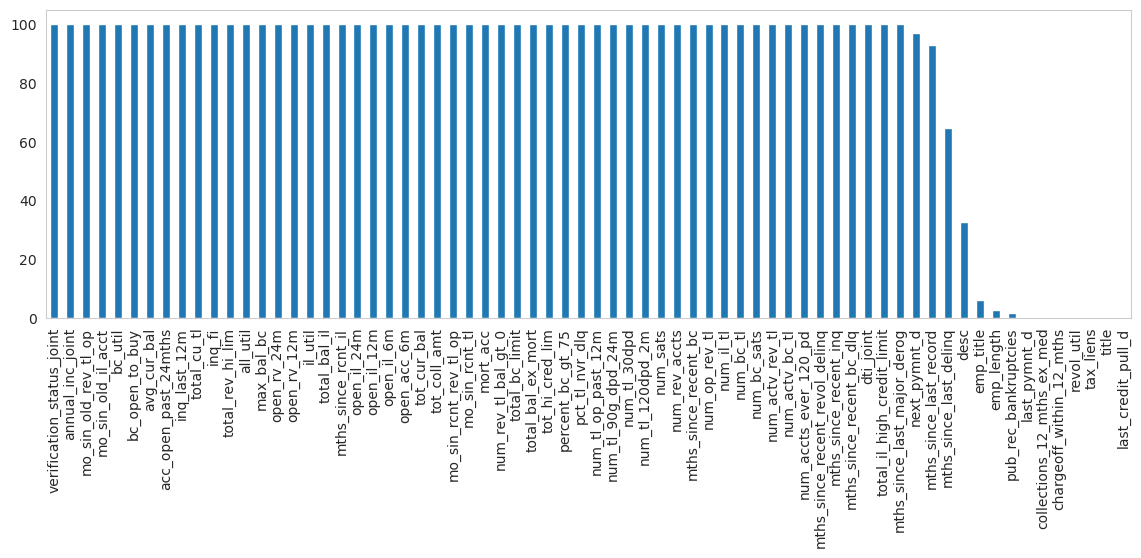

In [190]:
missing[missing > 0].plot(kind='bar',figsize=(14,4))
plt.show()

In [191]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 54)


In [192]:
# Identifying columns again with large amount null values based on percentage
missing = (loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False)
print(missing[missing > 0].sort_values(ascending = False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64


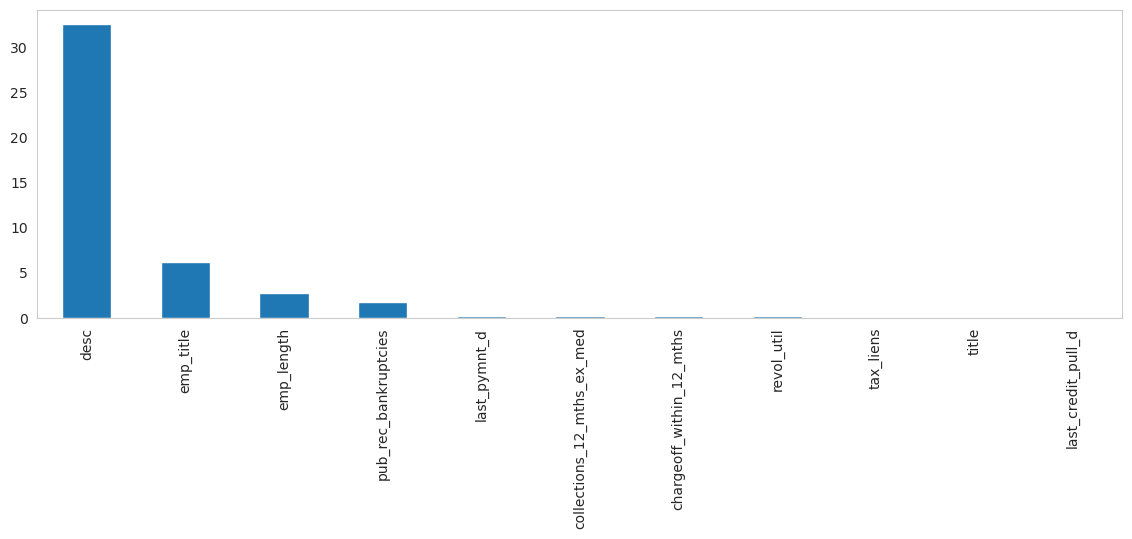

In [193]:
# barplotting for missing columns
missing[missing > 0].plot(kind='bar',figsize=(14,4))
plt.show()

##### We have removed the column which contain more than 50% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [194]:
# columns left after dropping unnecessary columns
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [195]:
# identifying for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


##### The max value of missing number is quite low compared to the count of column, so we will leave it as it is cause its impact is not significant

In [196]:
# Removing irrevalenat columns which will not help in analysis since they are fetched after loan is approved. 
## The following columns that we are removing are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing columns desc,emp_title,desc since they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_data=loan_data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 26)


##### Removed the above columns as they are customer behavior variables and are not available at time of decision and hence not useful for analysis.

In [197]:
# Identifying columns which have few unique values and has no impact to analysis
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [198]:
# Removing those columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 18)


In [199]:
# Checking the colums again
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


##### Since we are done with dropping irrelevant columns, its time to check for null values which can be removed or fixed based on the relevance  of the column

In [200]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


###### The above mention column "emp_length" and "pub_rec_bankruptcies" have null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [201]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [202]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


###### As for column 'emp_length', we can remove the null values as fixing null values are not feasible and will lead to loss of information.

In [203]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)

(38642, 18)


##### As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [204]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [205]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


##### Now let's remove the duplicate rows from the data if have any

In [206]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

(38642, 18)


##### Now we will correct the data type and Derive new columns

In [207]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [ ]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')


In [166]:
# Setting decimal point limit for all data 
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)
      
loan_data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
4 2011-12-01      Current           other         OR  17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
4                   0.0        2011           12

##### As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [167]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


In [168]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [169]:
# Divding the column as per categorical and continous
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

##### Now we will remove the outliers.

In [170]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement
## starting with loan_amnt
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.


In [171]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [172]:
## starting with annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

In [173]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

##### As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [174]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()


##### As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

In [175]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

#### So far we have cleaned the data and removed the outliers. Now lets go ahead with various analysis

* ### Univariate Analysis

Fully Paid     85.580932
Charged Off    14.419068
Name: loan_status, dtype: float64


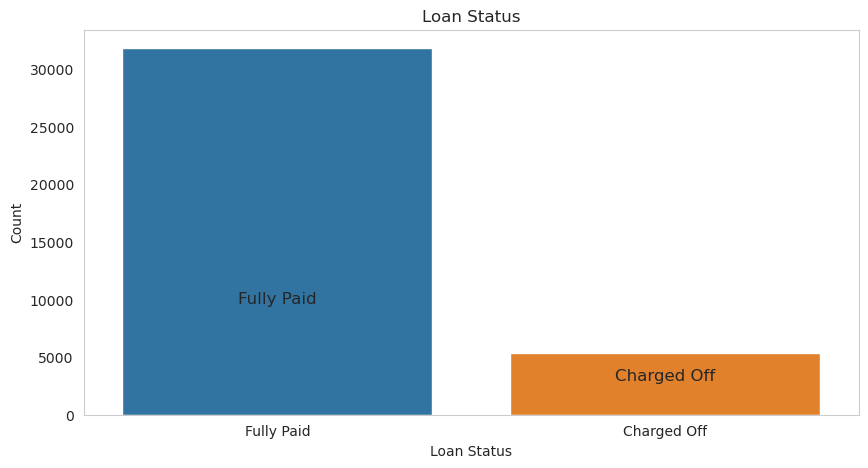

In [176]:
# Loan status 

print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=loan_data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

##### Inference: Defaulted loan are low in numbers compared to Fully Paid.

In [177]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()


count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


##### Inference: The loan amount varies from 500 to 35000 with a mean of 9800.

36    75.37729
60    24.62271
Name: term, dtype: float64


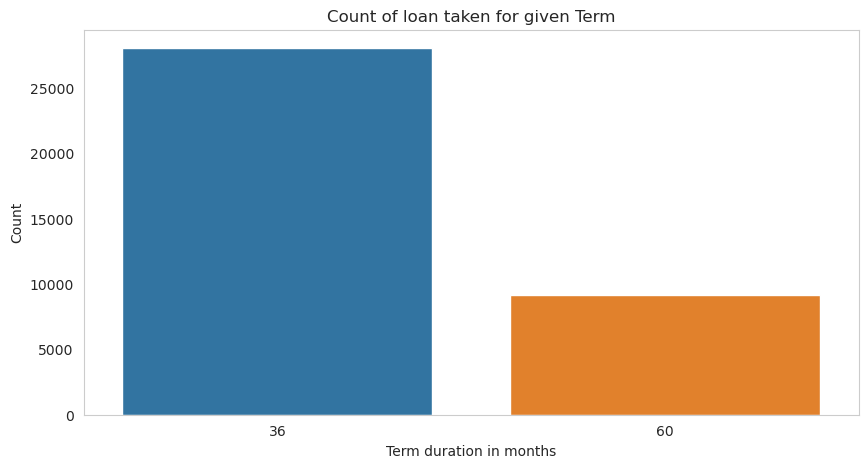

In [178]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

##### Inference: More than half of the loan taken has term of 36 months compared to 60 months.

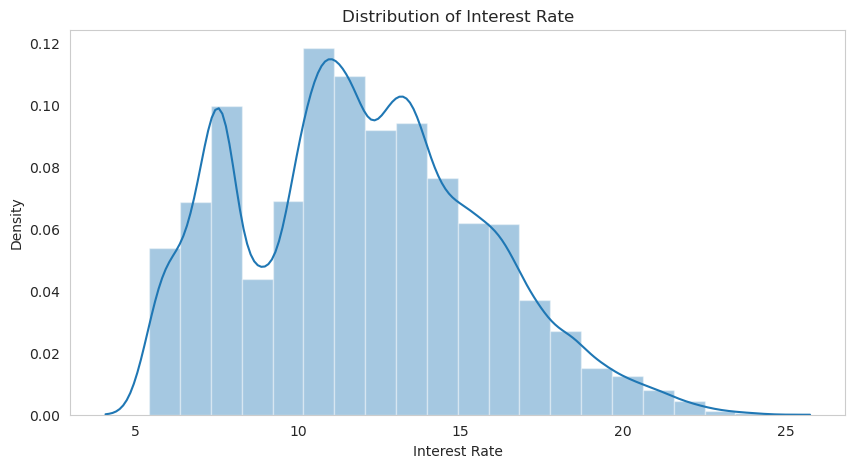

In [135]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

##### Inference: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

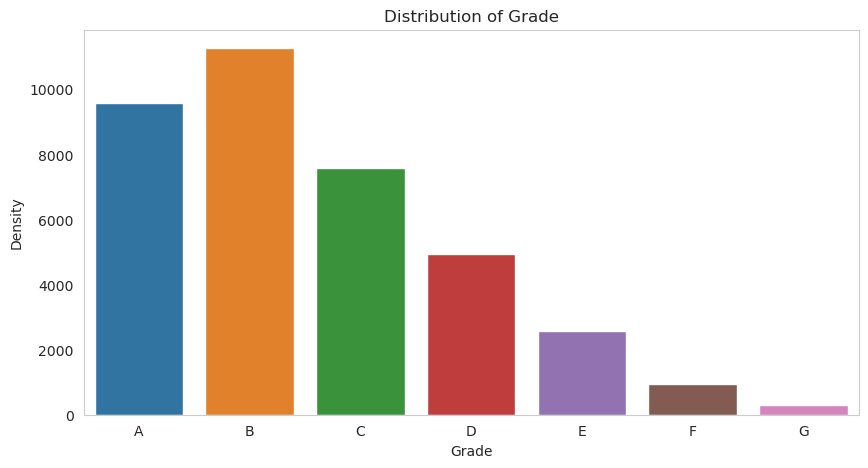

In [136]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

##### Inference: A large amount of loans are with grade 'A' and 'B' compared to rest showing most loans are high grade loans.

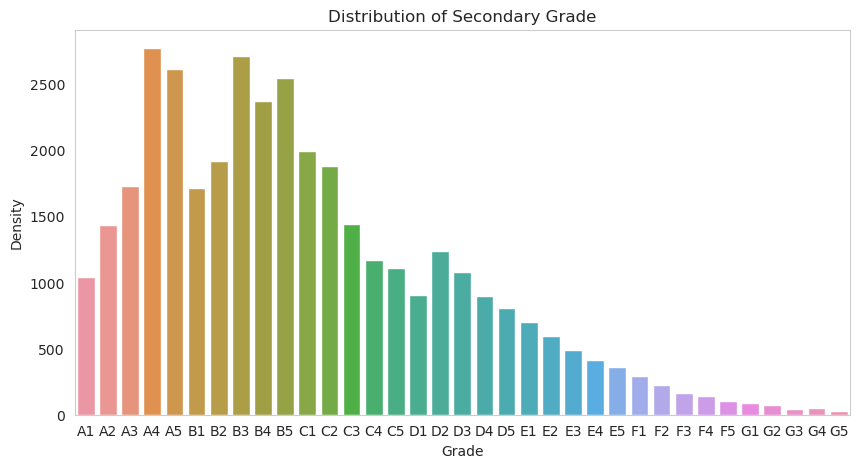

In [53]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

##### Inference: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

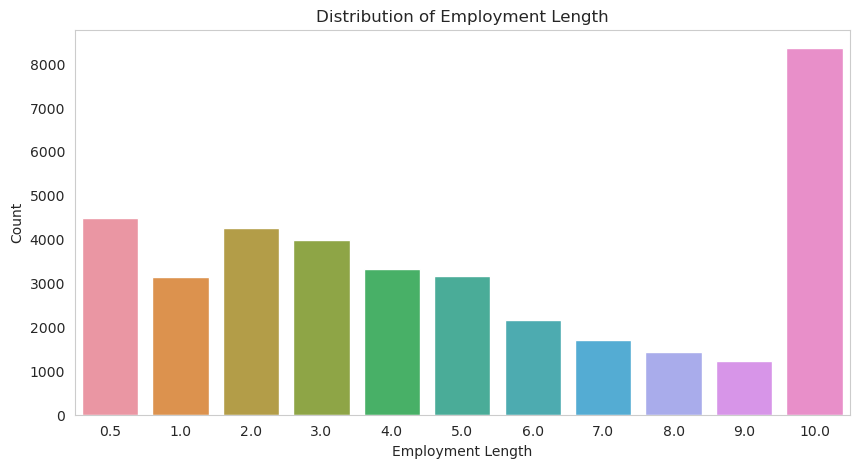

In [54]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

##### Inference: Majority of borrowsers have working experience greater than 10 years.

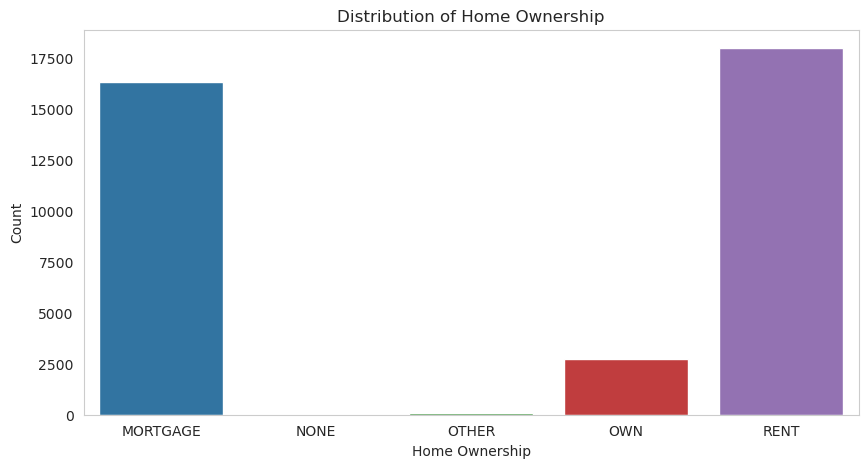

In [55]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

##### Inference: Majority of borrowsers don't posses property and are on mortage or rent.

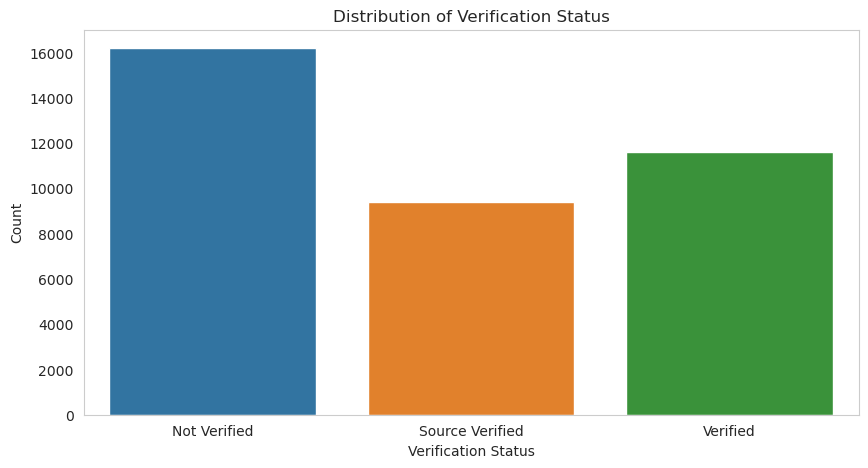

In [56]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

##### Inference: About 50% of the borrowers are verified by the company or have source verified.

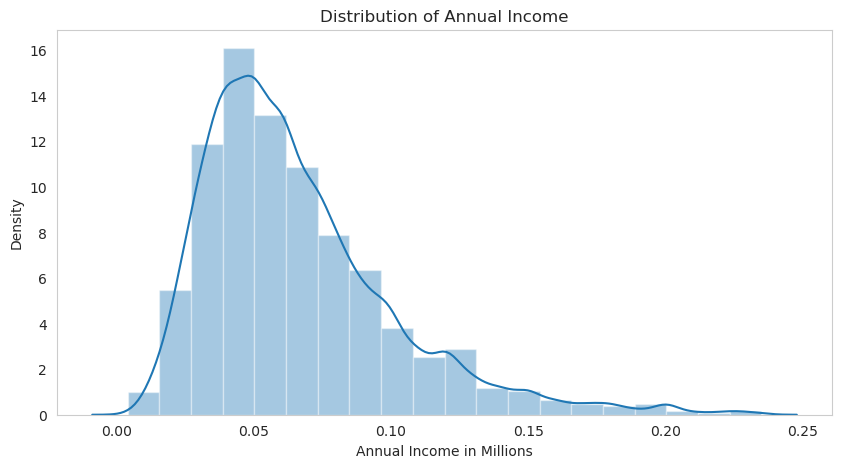

In [57]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(x=loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

##### Inference: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

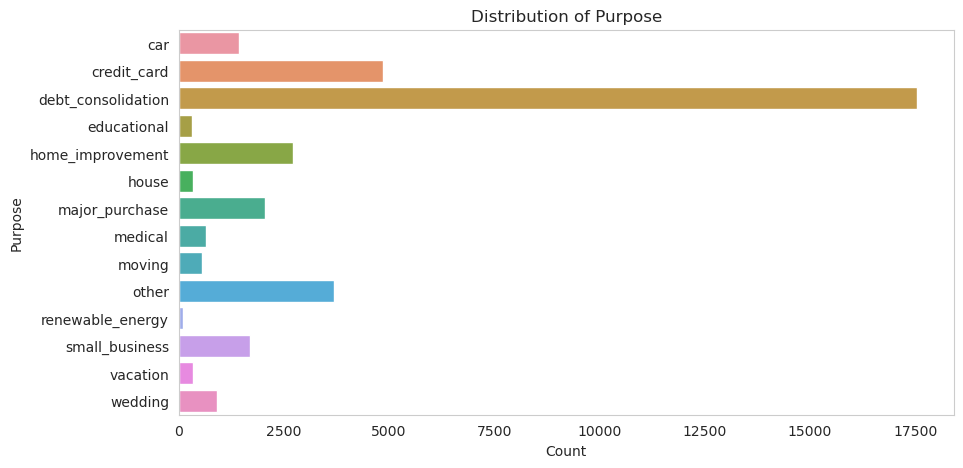

In [58]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

##### Inference: A large percentage of loans are taken for debt consolidation followed by credit card

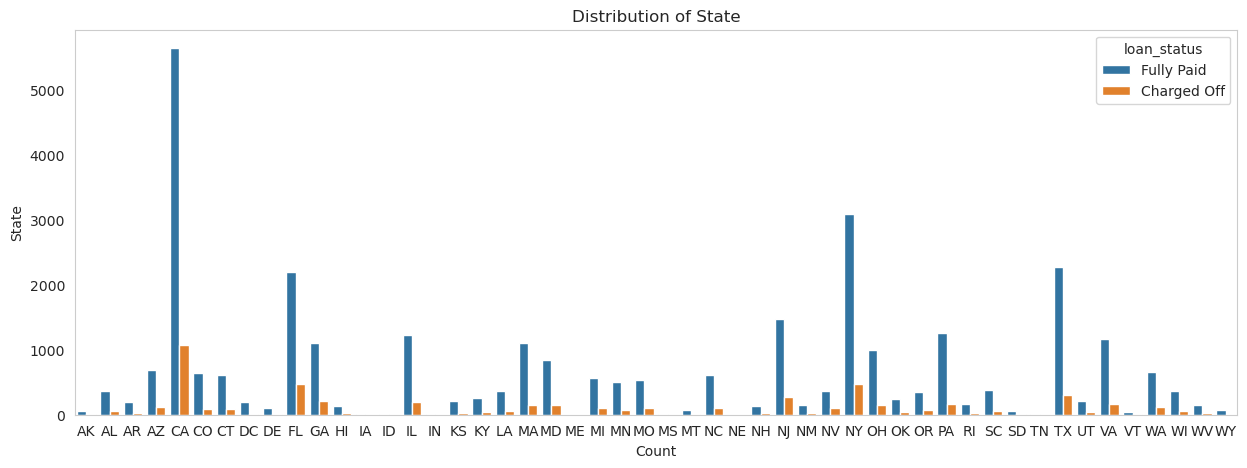

In [59]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(x=loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

##### Inference: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

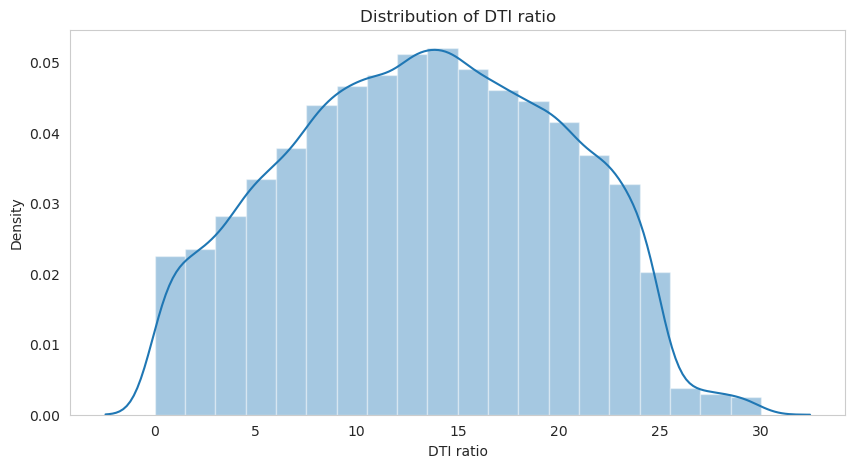

In [60]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(x=loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

##### Inference: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

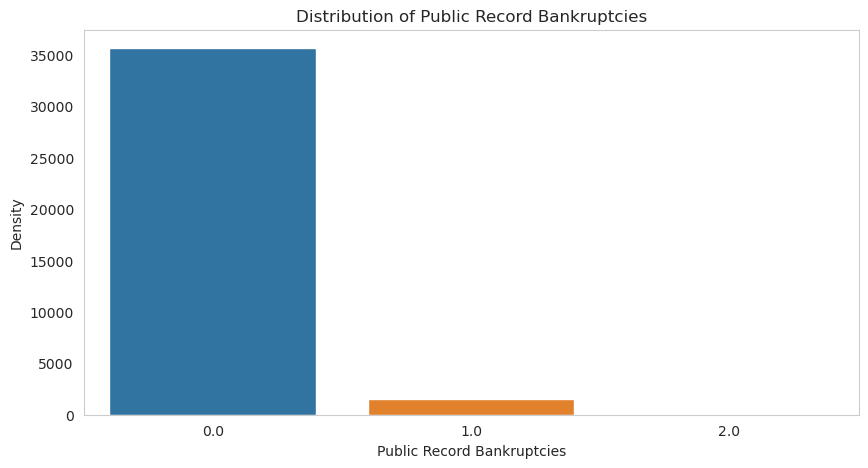

In [61]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

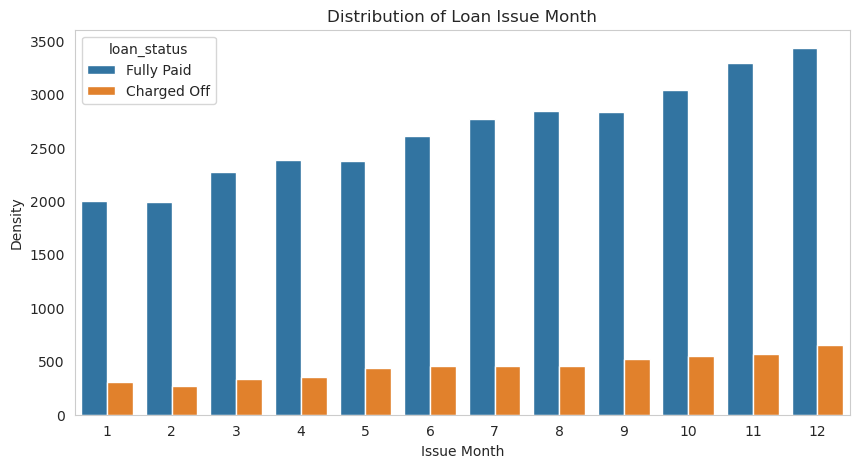

In [62]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.issue_month,hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

##### Inference: Majority of the loans are given in last quarter of the year.

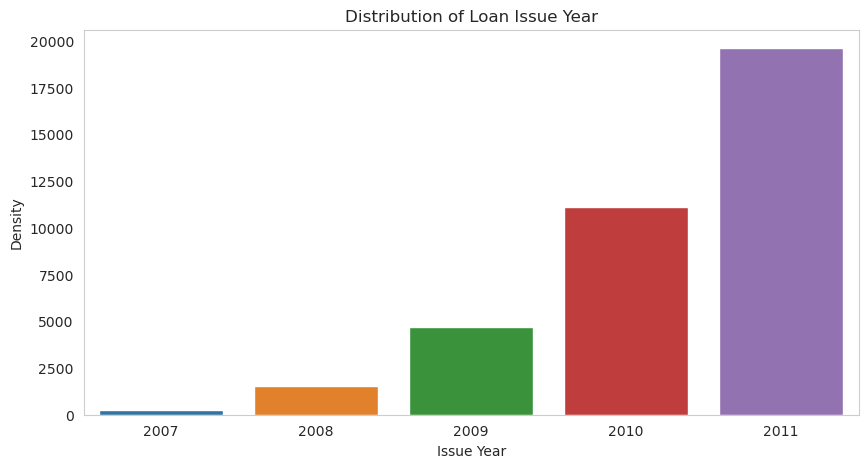

In [63]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

##### Inference: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

* ### Segmented Univariate Analysis

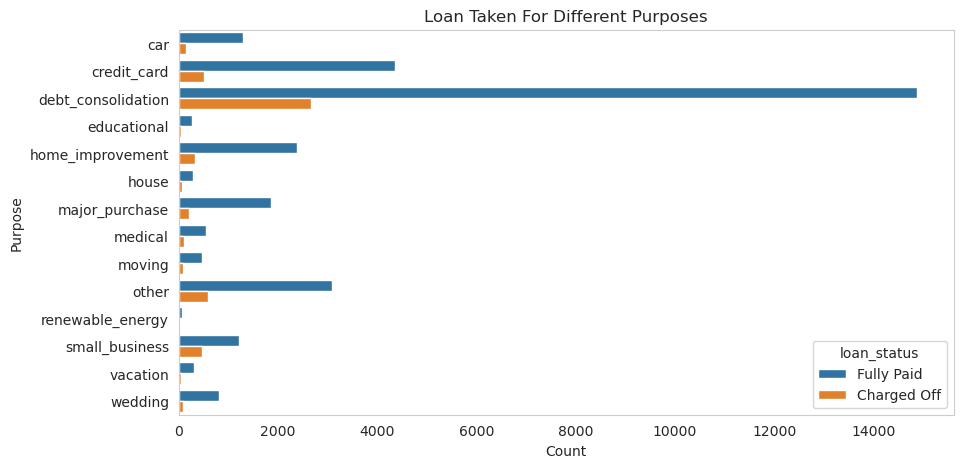

In [64]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

##### Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

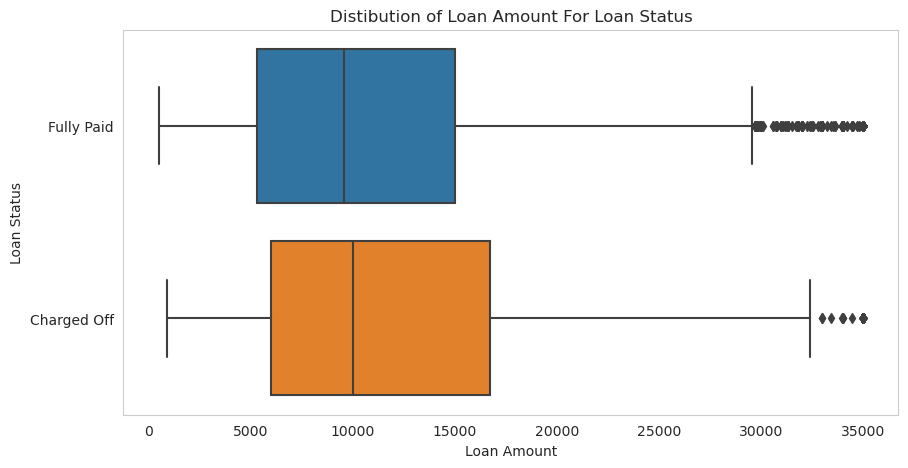

In [65]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

###### Inference: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

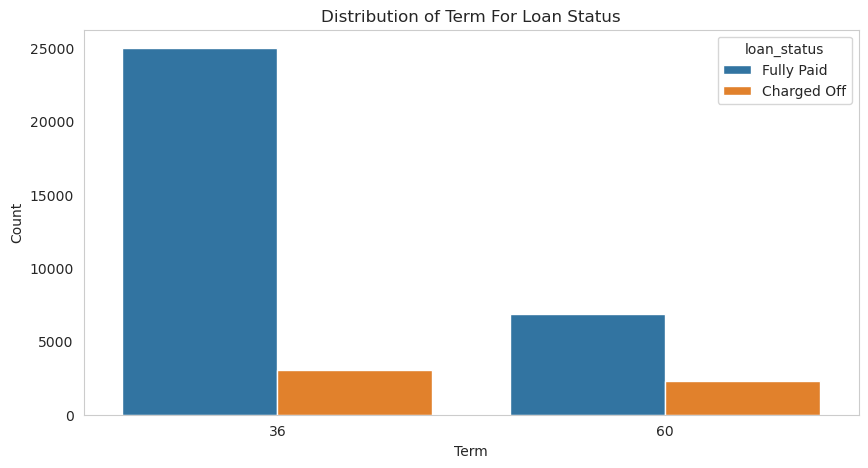

In [66]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

##### Inference: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

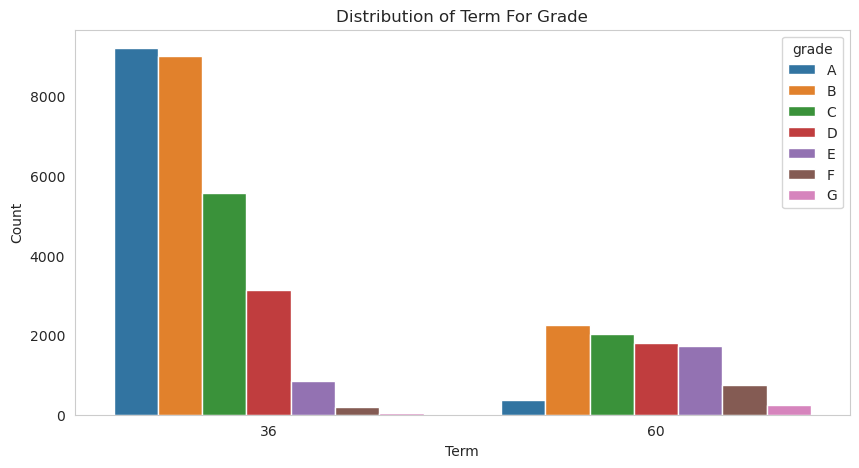

In [67]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

##### Inference: The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

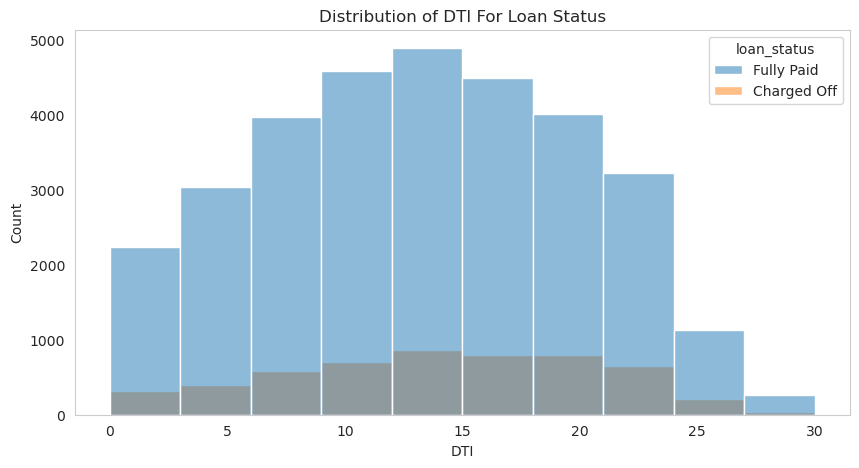

In [68]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

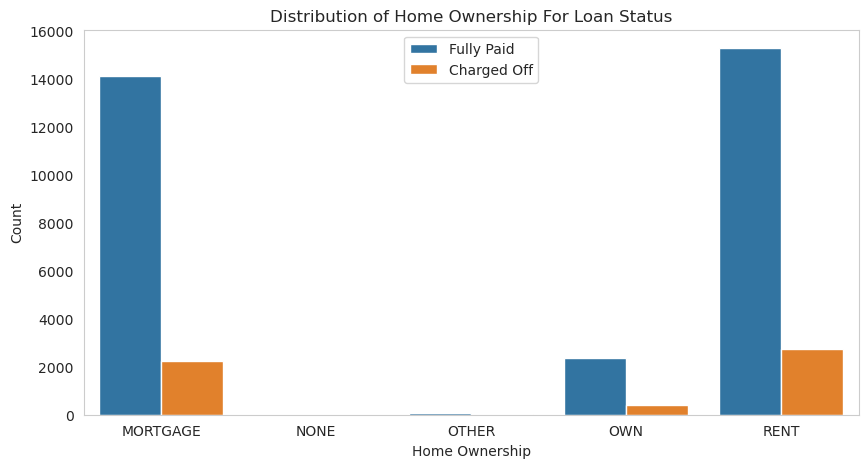

In [69]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

##### Inference: The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

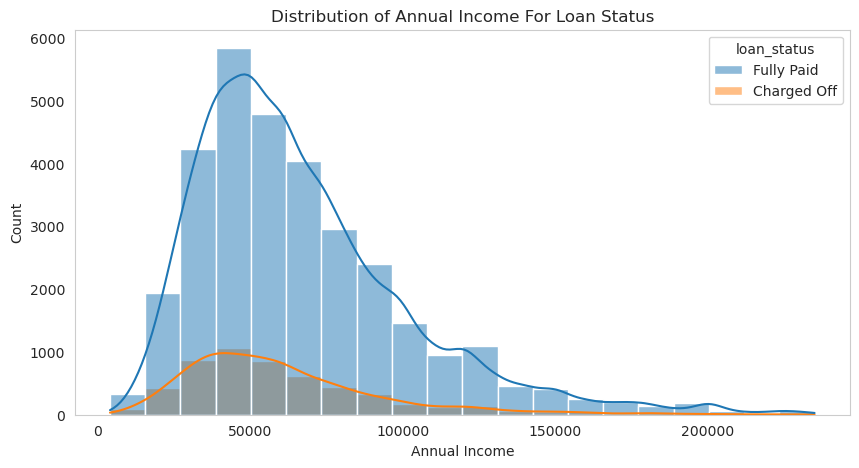

In [70]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

##### Inference: Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

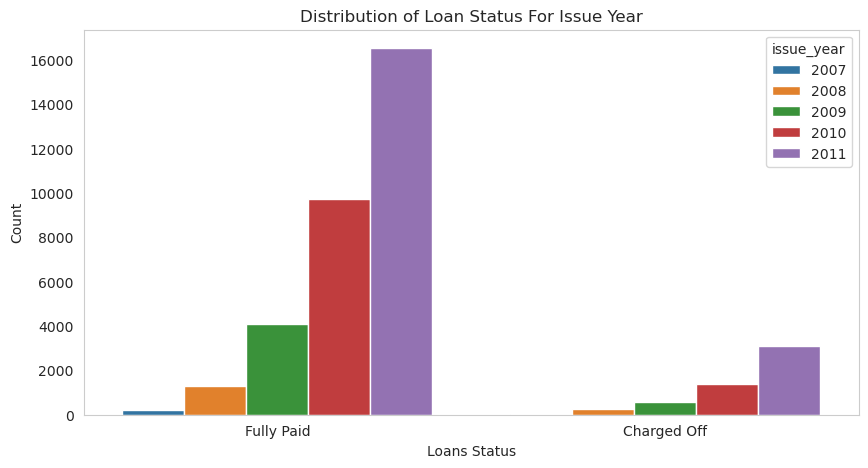

In [71]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

##### Inference: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

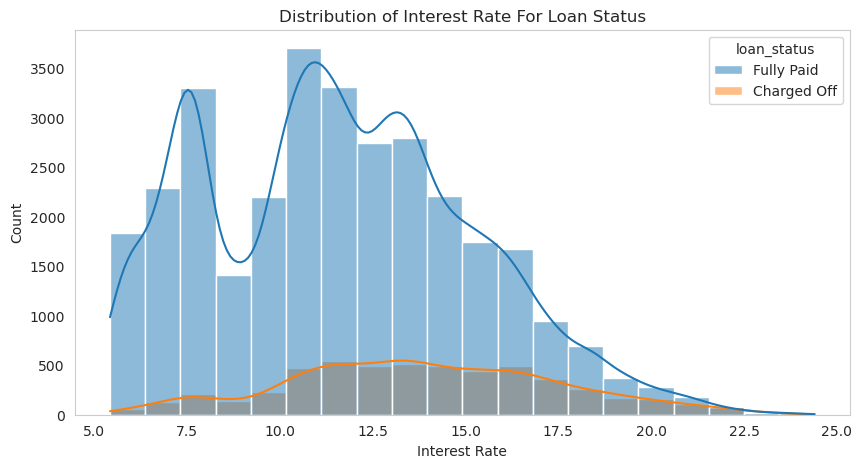

In [164]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

##### Inference: The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

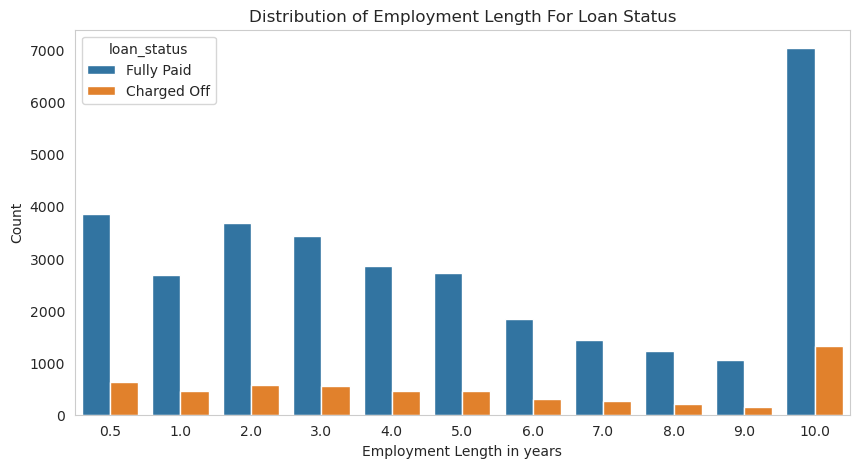

In [165]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

##### Inference: The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

* ### Bivariate Analysis

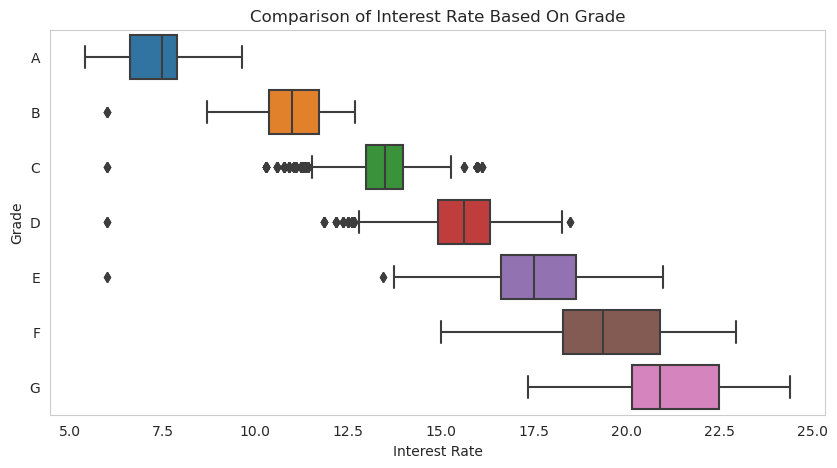

In [166]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

##### Inference: The Grade represent risk factor thus we can say interst rate increases with the risk.

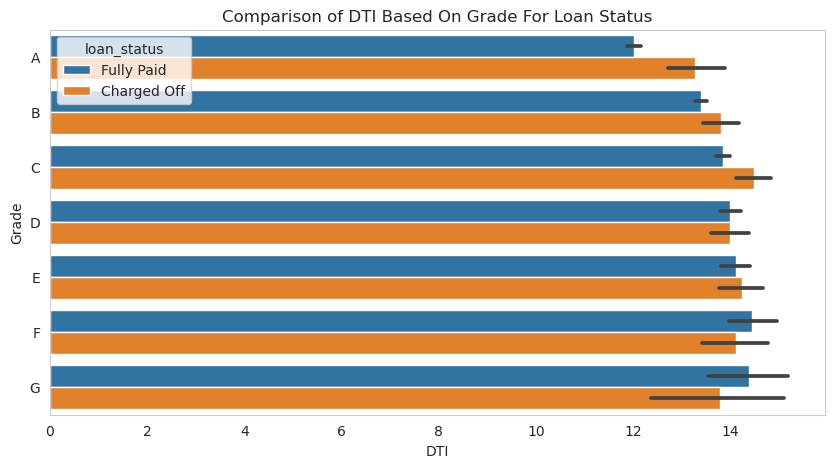

In [76]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

##### Inference: The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

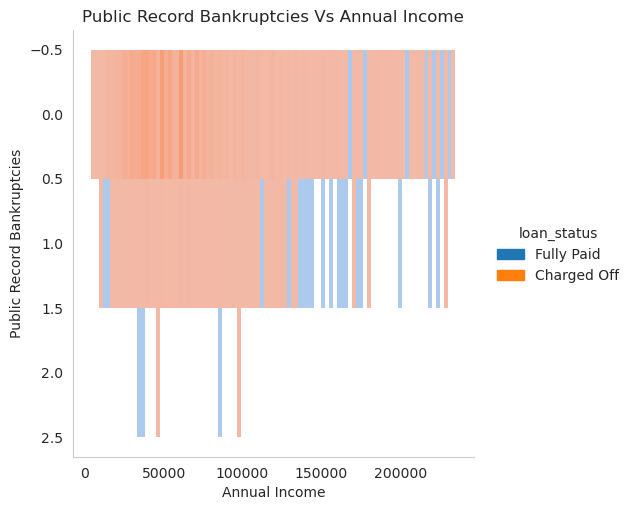

In [168]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

##### Inference: The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

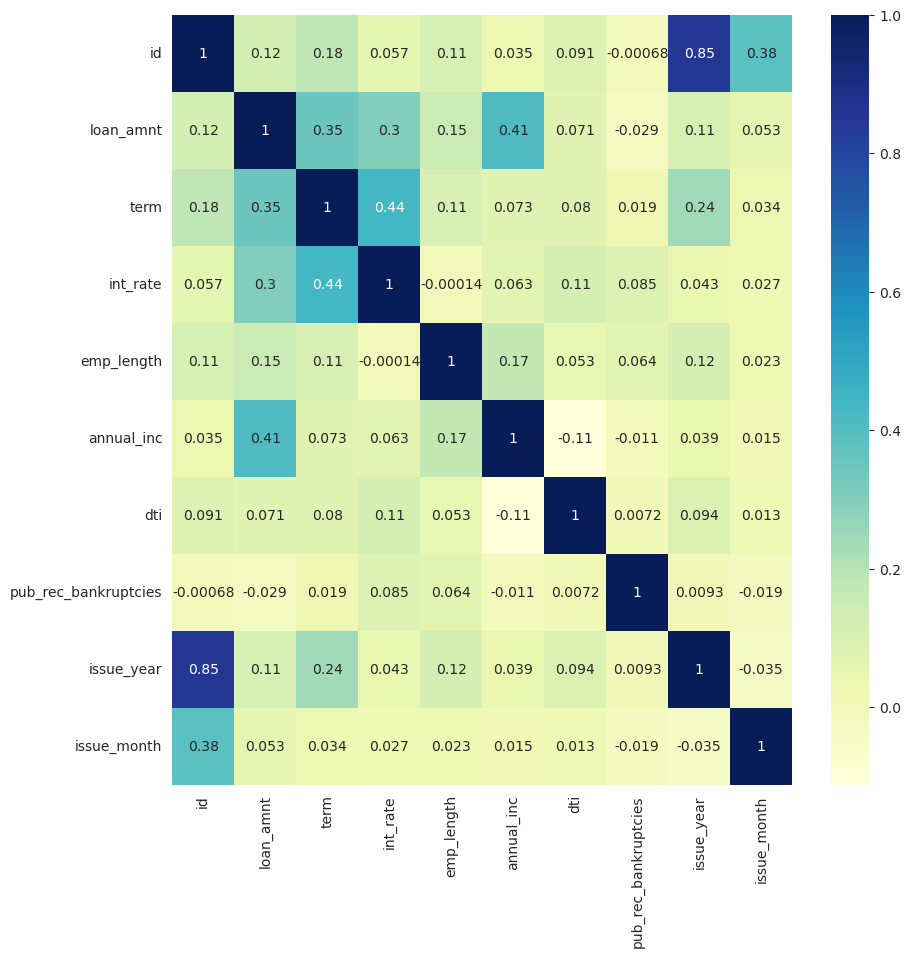

In [72]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),cmap="YlGnBu", annot=True)
plt.show()

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Borrowers not from large urban cities like california, new york, texas, florida etc. 
    2. Borrowers having annual income in the range 50000-100000.
    3. Borrowers having Public Recorded Bankruptcy.
    4. Borrowers with least grades like E,F,G which indicates high risk.
    5. Borrowers with very high Debt to Income value.
    6. Borrowers with working experience 10+ years.